# Heart Disease Prediction a

## Project Introduction

This notebook explores the Heart Disease dataset to predict the presence of heart disease and to identify potential clusters within the data. The project aims to build and evaluate various classification models for accurate prediction and to utilize clustering techniques for discovering underlying patterns in patient data.

## Dataset Description

The dataset contains information related to heart disease patients, including demographic details, medical measurements, and the presence of heart disease.

## Approach

The analysis follows these steps:
1. **Exploratory Data Analysis (EDA):** Understand the structure and characteristics of the data, including distributions and relationships between features.
2. **Data Preprocessing:** Clean the data, handle missing values and outliers, encode categorical variables, and scale numerical features..
3. **Supervised Learning (Classification):** Train and evaluate several classification models to predict heart disease.


# Importing Libraries and Setting Up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_curve, auc, silhouette_score


# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('/content/heart_disease.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Rename columns
df = df.rename(columns={
    "dataset": "city",
    "cp": "Chest Pain",
    "trestbps": "Resting blood pressure",
    "chol": "Serum cholesterol",
    "fbs": "Fasting blood sugar",
    "thalach": "max heart rate achieved",
    "exang": "Exercise induced angina",
    "thal": "thalassemia",
    "num": "Heart Disease"
})
df.head()

,id,age,sex,city,Chest Pain,Resting blood pressure,Serum cholesterol,Fasting blood sugar,restecg,thalch,Exercise induced angina,oldpeak,slope,ca,thalassemia,Heart Disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#Data preprocessing


In [5]:
#check the percentage of null values
null_percentage = df.isnull().mean() * 100
null_percentage

,0
id,0.000000
age,0.000000
sex,0.000000
city,0.000000
Chest Pain,0.000000
Resting blood pressure,6.413043
Serum cholesterol,3.260870
Fasting blood sugar,9.782609
restecg,0.217391
thalch,5.978261


In [6]:
def imputation(df):
  for col in df.select_dtypes(include="number").columns:
    mean_val=df[col].mean()
    median_val=df[col].median()

    if abs(mean_val-median_val)/(median_val if median_val != 0 else 1)<0.1:
      print(f"{col}:use mean ({mean_val:.2f})")
    else:
      print(f"{col}:use median ({median_val:.2f})")
df1=imputation(df)

id:use mean (460.50)
age:use mean (53.51)
Resting blood pressure:use mean (132.13)
Serum cholesterol:use median (223.00)
thalch:use mean (137.55)
oldpeak:use median (0.50)
ca:use median (0.00)
Heart Disease:use mean (1.00)


In [7]:
mode_col=['thalassemia','slope','Exercise induced angina','Fasting blood sugar','restecg']
df[mode_col] = df[mode_col].fillna(df[mode_col].mode().iloc[0])
mean_Col=['ca','oldpeak','Serum cholesterol','thalch','Resting blood pressure']
df[mean_Col]=df[mean_Col].fillna(df[mean_Col].mean())

/tmp/ipython-input-3252154325.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[mode_col] = df[mode_col].fillna(df[mode_col].mode().iloc[0])


In [8]:
df.isnull().sum()
df = df.drop(['id', 'city'], axis=1)

In [9]:
df.head()

,age,sex,Chest Pain,Resting blood pressure,Serum cholesterol,Fasting blood sugar,restecg,thalch,Exercise induced angina,oldpeak,slope,ca,thalassemia,Heart Disease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
df['Fasting blood sugar'] = df['Fasting blood sugar'].astype(int)
df['Exercise induced angina'] = df['Exercise induced angina'].astype(int)

In [11]:
df.head()

,age,sex,Chest Pain,Resting blood pressure,Serum cholesterol,Fasting blood sugar,restecg,thalch,Exercise induced angina,oldpeak,slope,ca,thalassemia,Heart Disease
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


## Encoding

In [12]:
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
df = df.copy()
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,age,sex,Chest Pain,Resting blood pressure,Serum cholesterol,Fasting blood sugar,restecg,thalch,Exercise induced angina,oldpeak,slope,ca,thalassemia,Heart Disease
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


##Feature/Target split and scaling

In [14]:
x=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#scale features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Classfication Models


In [15]:
Models={
    'Logistic Regression':LogisticRegression(),
    'Support Vector Machine':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'XGBoost':XGBClassifier()
}
results = {}

# Loop through each model
for name, model in Models.items():
    model.fit(x_train, y_train)              # Train model
    y_pred = model.predict(x_test)           # Predict
    acc = accuracy_score(y_test, y_pred) * 100  # Accuracy in percentage
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}%")

# Show best model
best_model = max(results, key=results.get)
print("\n✅ Best Model:", best_model, "with accuracy:", f"{results[best_model]:.2f}%")

Logistic Regression Accuracy: 82.07%
Support Vector Machine Accuracy: 84.24%
Decision Tree Accuracy: 75.00%
Random Forest Accuracy: 83.15%
XGBoost Accuracy: 85.33%

✅ Best Model: XGBoost with accuracy: 85.33%


🔹 Model Evaluation Results:
Accuracy  : 0.8533
Precision : 0.8505
Recall    : 0.8922
F1-Score  : 0.8708

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.85      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



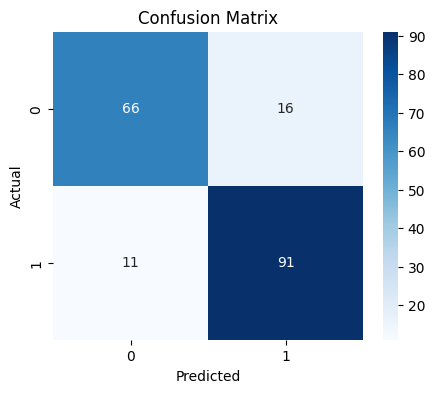

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# نفترض إن y_test هي القيم الحقيقية و y_pred هي التوقعات من الموديل
# مثلاً:
# y_pred = model.predict(X_test)

# الحسابات
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🔹 Model Evaluation Results:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# رسم ال Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Save the best Model

In [16]:
xgb_model = XGBClassifier(
    n_estimators=206,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # مهم لتجنب التحذيرات
)

xgb_model.fit(x_train, y_train)
joblib.dump(xgb_model, 'best_xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("💾 XGBoost model saved successfully as 'best_xgboost_model.pkl'")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:03:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


💾 XGBoost model saved successfully as 'best_xgboost_model.pkl'
